# 차원축소 (PCA: Principal Component Analysis)
- PCA는 데이터를 가장 잘 설명할 수 있는, 데이터의 분산을 최대화하는 방향으로 축을 결정
![PCA-LDA](https://d.pr/i/hI0WaD+)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

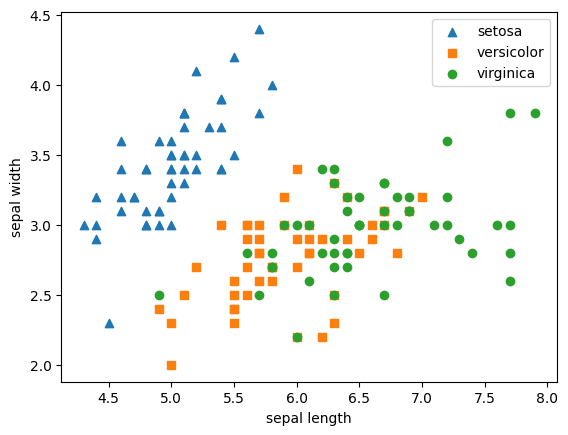

In [10]:
# 특성 선택을 통한 시각화 (2개 특성만 선택하여 시각화)
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소하겠단 뜻

# 차원축소
X = iris_df.iloc[:, :-1] # row는 다 가져오고 col은 마지막(target)꺼 빼고
pca.fit(X)
iris_pca = pca.transform(X)
iris_pca.shape # 특성이 4 -> 2

(150, 2)

In [16]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target

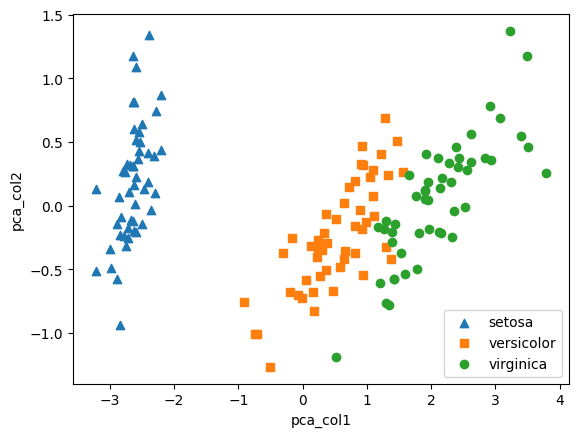

In [ ]:
# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [ ]:
# PCA를 통해 생성된 주성분들이 실제 데이터의 총 분산에 얼마만큼의 비율을 나타내는지
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [23]:
# 원본 데이터 학습 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5) # cv=5는 5번 교차검증
scores, scores.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 np.float64(0.9733333333333334))

In [24]:
# PCA 데이터 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_pca_df[['pca_col1', 'pca_col2']], iris_pca_df['target'], cv=5) # cv=5는 5번 교차검증
scores, scores.mean()

(array([0.93333333, 1.        , 0.93333333, 0.93333333, 1.        ]),
 np.float64(0.96))

### PCA 과일 데이터
- 흑백 이미지 데이터 픽셀값 0~255

In [ ]:
fruits = np.load('../../data/fruits_300.npy')
fruits.shape # 300개 이미지 * 100행 * 100열

(300, 100, 100)

In [ ]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')
    
    plt.show()

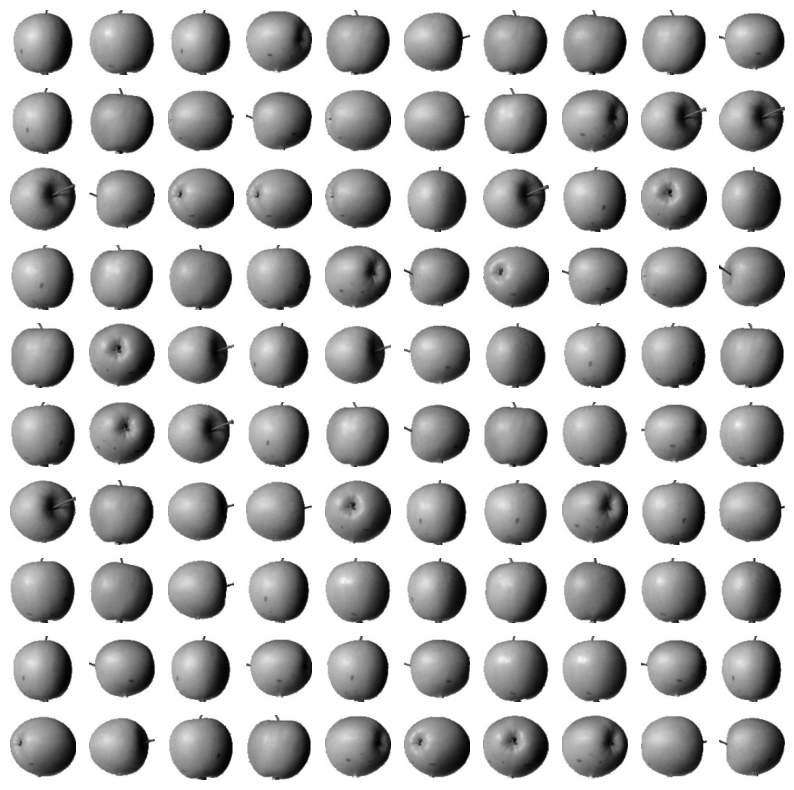

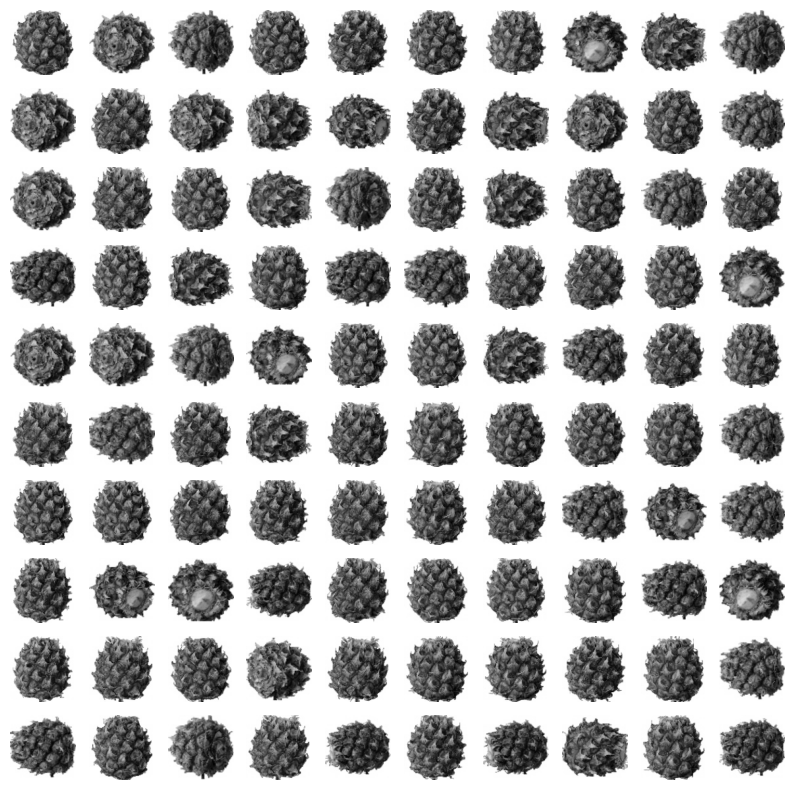

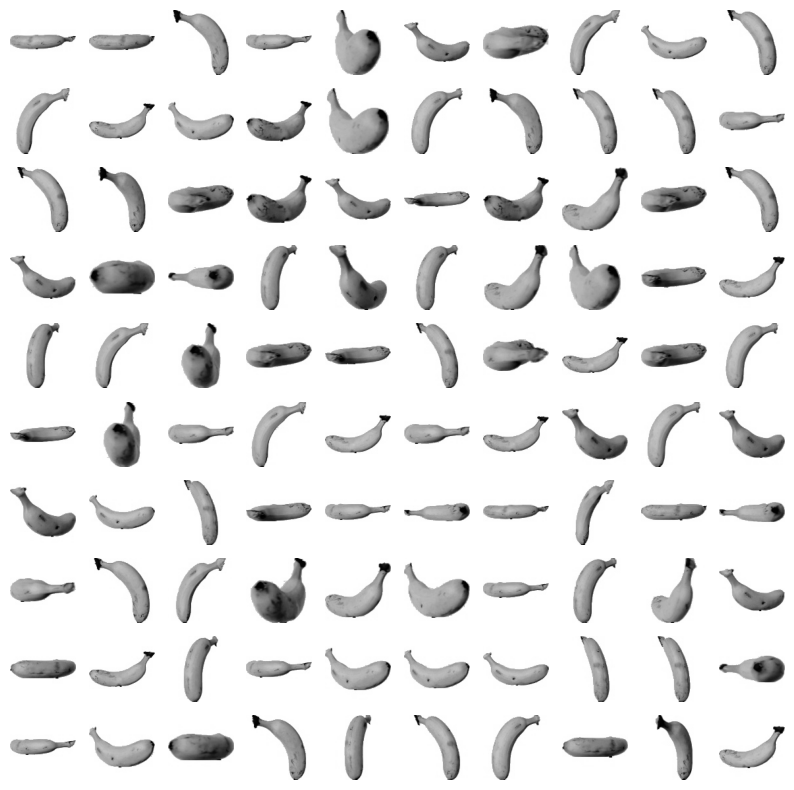

In [43]:
draw_fruits(fruits[:100])
draw_fruits(fruits[100:200])
draw_fruits(fruits[200:300])

In [ ]:
# 300개 이미지를 1차원 데이터로 펼치기
# PCA하려면 1차원으로 펴야함
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

(300, 10000)

In [51]:
# 50차원으로 차원 축소
pca = PCA(n_components=50)
pca.fit(fruits_1d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [52]:
pca.components_.shape # PCA로 구현한 주성분 개수, 원본 데이터 특성 개수

(50, 10000)

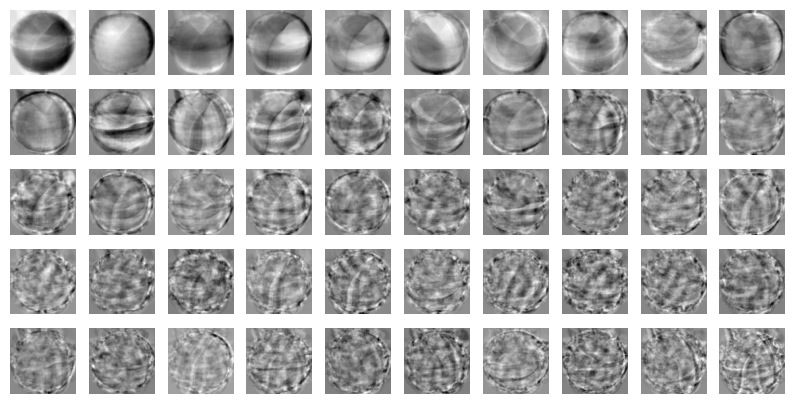

In [53]:
# 이미지 출력하기 위해 다시 3차원으로 바꾸기
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [54]:
fruits_pca = pca.transform(fruits_1d)
fruits_pca.shape

(300, 50)

In [55]:
np.save('../../data/fruits_pca.npy', fruits_pca)

In [ ]:
# 저장한 PCA 데이터 로드
fruits_pca = np.load('../../data/fruits_pca.npy')

In [ ]:
fruits_pca = pca.fit(fruits_pca)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511203
 0.00486384 0.00480347 0.00447837 0.00437316 0.00408036 0.00389477
 0.00372428 0.00359277 0.00331454 0.00317852 0.00304338 0.00303727
 0.00288888 0.00275841 0.00264863 0.00255877 0.00252023 0.00247279
 0.00239389 0.00230822 0.00222102 0.00216835 0.00213519 0.00196242
 0.00192984 0.00190864 0.00185499 0.00181812 0.00173565 0.00169546
 0.00161681 0.00159865]
0.9215726281457385


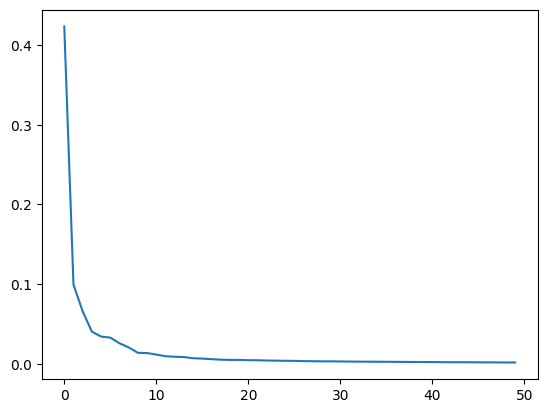

In [ ]:
# 주성분
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)

In [68]:
# 라벨 데이터 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
from sklearn.model_selection import cross_validate
lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3)
result

{'fit_time': array([0.15350342, 0.14597631, 0.14302301]),
 'score_time': array([0.00300121, 0.00198078, 0.00332594]),
 'test_score': array([1.  , 1.  , 0.99])}

In [69]:
# PCA 데이터 교차검증 점수 확인
result_pca = cross_validate(lr_clf, fruits_pca, target, cv=3)
result_pca

{'fit_time': array([0.01281548, 0.0094254 , 0.00298452]),
 'score_time': array([0.        , 0.00101709, 0.00101948]),
 'test_score': array([1.  , 1.  , 0.99])}

In [71]:
# 차원축소된거 원본으로 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

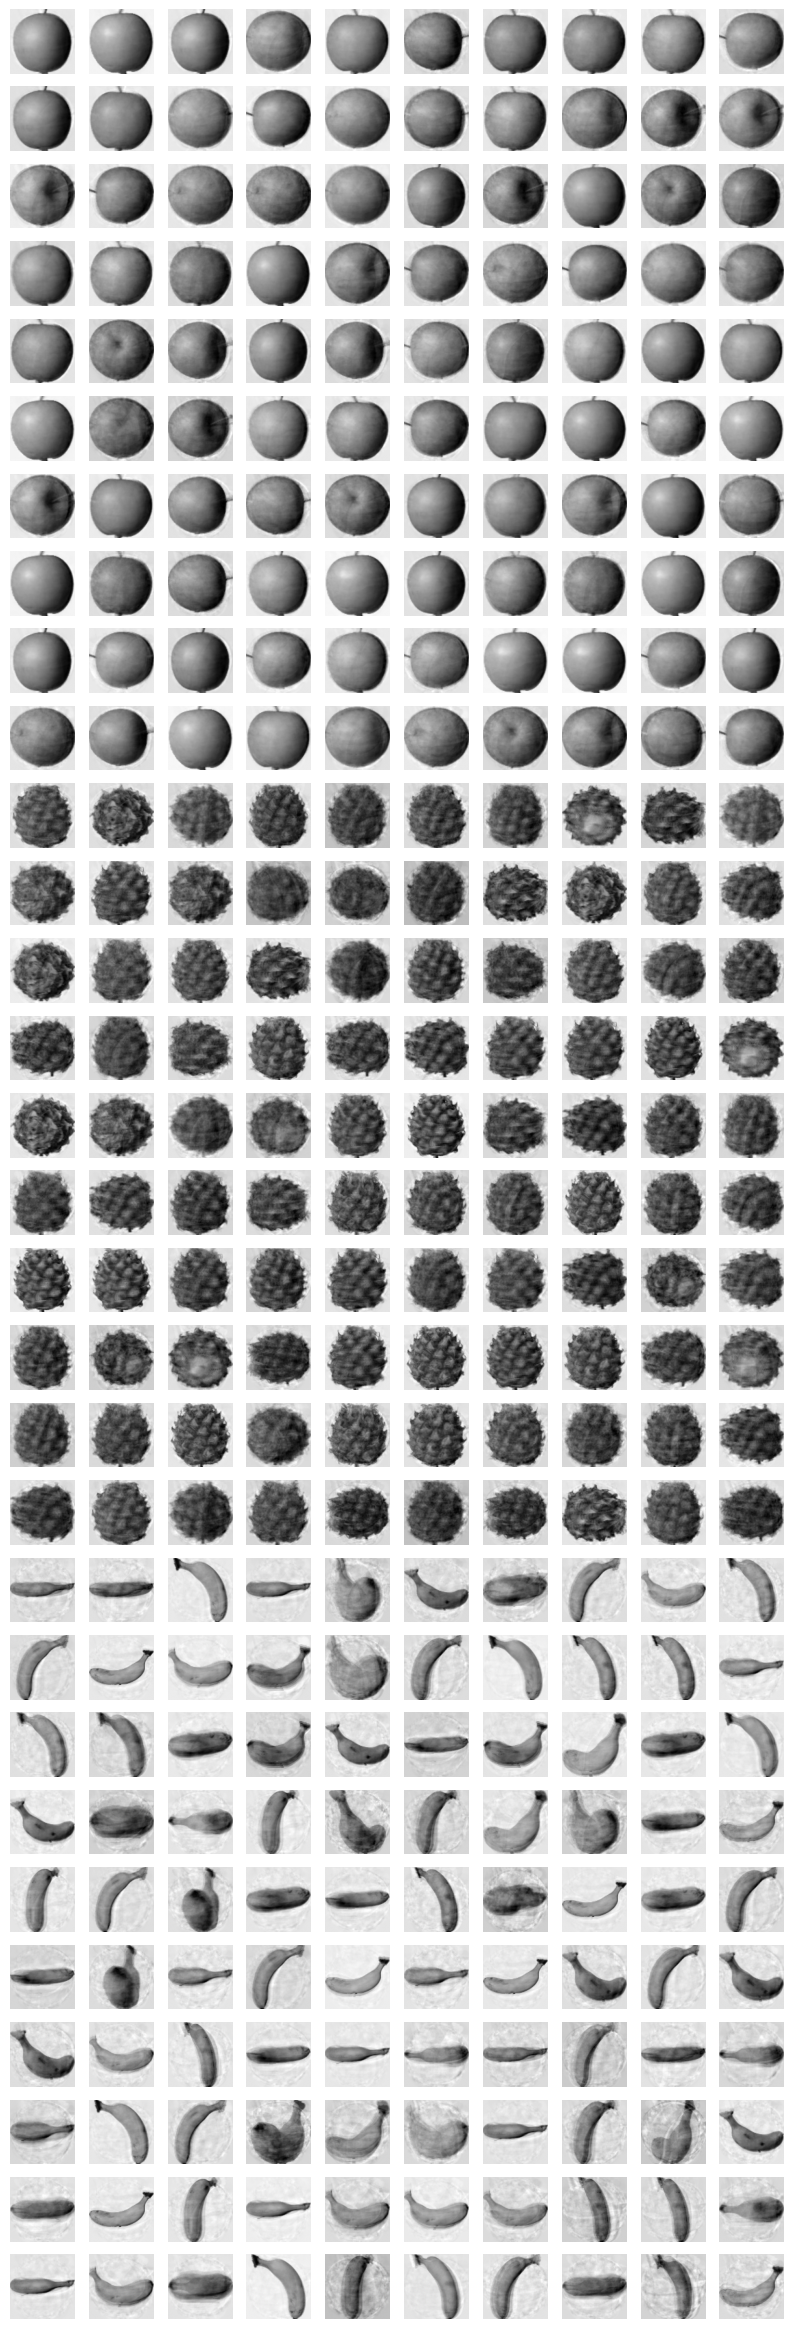

In [72]:
# 복구한 이미지로 시각화
draw_fruits(fruits_inverse.reshape(-1, 100, 100))